In [1]:
from keras.layers import Input, Dense
from keras.models import Model
from keras.datasets import mnist

import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: l

In [2]:
#Load our MNIST dataset.
(X_train, y_train), (X_test, y_test) = mnist.load_data()

print('X_train shape = ',X_train.shape)
print('X_test shape = ',X_test.shape)
print('y_train shape = ',y_train.shape)
print('y_test shape = ',y_test.shape)

11490434/11490434 [==============================] - 0s 0us/step
X_train shape =  (60000, 28, 28)
X_test shape =  (10000, 28, 28)
y_train shape =  (60000,)
y_test shape =  (10000,)


In [3]:
X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255

X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)

print (X_train.shape)
print (X_test.shape)

(60000, 784)
(10000, 784)


In [4]:
input_layer = Input(shape = (784,))

hidden1_layer = Dense(256, activation = 'relu')(input_layer)
hidden2_layer = Dense(128, activation = 'relu')(hidden1_layer)
hidden3_layer = Dense(64, activation = 'relu')(hidden2_layer)
hidden4_layer = Dense(32, activation = 'relu')(hidden3_layer)

hidden5_layer = Dense(64, activation = 'relu')(hidden4_layer)
hidden6_layer = Dense(128, activation = 'relu')(hidden5_layer)
hidden7_layer = Dense(256, activation = 'relu')(hidden6_layer)

output_layer = Dense(784, activation = 'sigmoid')(hidden7_layer)

AutoencoderModel = Model(input_layer, output_layer)

AutoencoderModel.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense (Dense)               (None, 256)               200960    
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dense_3 (Dense)             (None, 32)                2080      
                                                                 
 dense_4 (Dense)             (None, 64)                2112      
                                                                 
 dense_5 (Dense)             (None, 128)               8320  

In [5]:
AutoencoderModel.compile(optimizer = 'adam', loss = 'binary_crossentropy')

history = AutoencoderModel.fit(X_train, X_train, batch_size = 256, epochs = 100, shuffle = True, validation_data = (X_test, X_test))
predict_digit = AutoencoderModel.predict(X_test)

Epoch 1/100
235/235 [==============================] - 8s 7ms/step - loss: 0.2452 - val_loss: 0.1720
Epoch 2/100
235/235 [==============================] - 1s 5ms/step - loss: 0.1520 - val_loss: 0.1382
Epoch 3/100
235/235 [==============================] - 1s 5ms/step - loss: 0.1330 - val_loss: 0.1260
Epoch 4/100
235/235 [==============================] - 1s 5ms/step - loss: 0.1228 - val_loss: 0.1181
Epoch 5/100
235/235 [==============================] - 1s 5ms/step - loss: 0.1164 - val_loss: 0.1131
Epoch 6/100
235/235 [==============================] - 1s 6ms/step - loss: 0.1119 - val_loss: 0.1085
Epoch 7/100
235/235 [==============================] - 1s 5ms/step - loss: 0.1080 - val_loss: 0.1058
Epoch 8/100
235/235 [==============================] - 1s 5ms/step - loss: 0.1050 - val_loss: 0.1036
Epoch 9/100
235/235 [==============================] - 1s 5ms/step - loss: 0.1030 - val_loss: 0.1009
Epoch 10/100
235/235 [==============================] - 1s 6ms/step - loss: 0.1012 - val_lo

dict_keys(['loss', 'val_loss'])


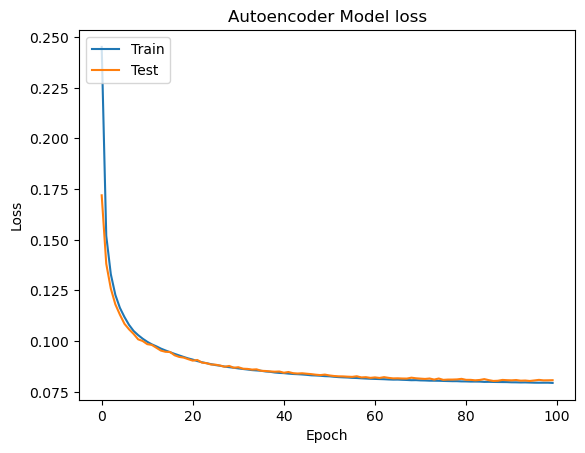

In [6]:
def plotmodelhistory(history): 
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Autoencoder Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper left')
    plt.show()

# list all data in history
print(history.history.keys())
# visualization of the loss minimization during the training process
plotmodelhistory(history)

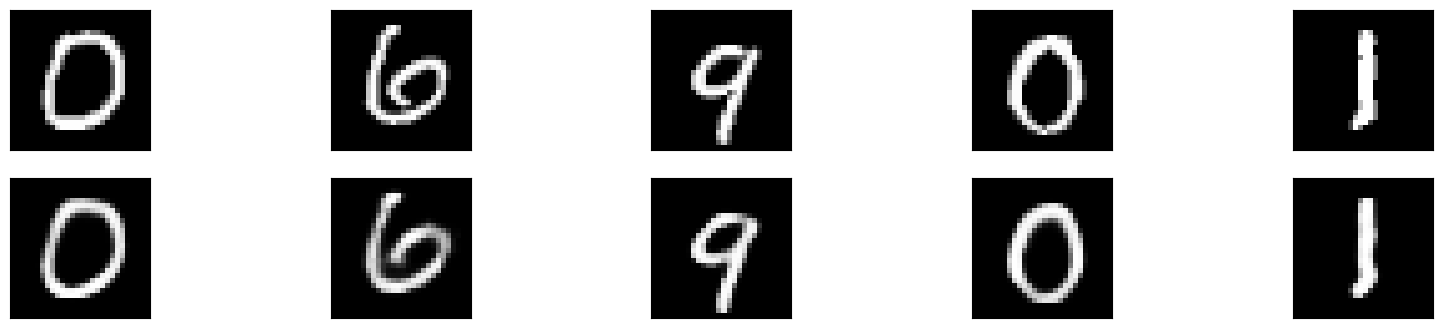

In [7]:
n = 5
plt.figure(figsize=(20, 4))
for i in range(n):
    ax = plt.subplot(2, n, i + 1)
    # input image
    plt.imshow(X_test[i+10].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    ax = plt.subplot(2, n, i + 1 + n)
    # Image decoded by our Auto-encoder
    plt.imshow(predict_digit[i+10].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()